In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the regular season and playoff data
regular_season_df = pd.read_csv('/kaggle/input/2023-2024-nba-player-stats/2023-2024 NBA Player Stats - Regular.csv', sep=';', encoding='latin1')
playoffs_df = pd.read_csv('/kaggle/input/2023-2024-nba-player-stats/2023-2024 NBA Player Stats - Playoffs.csv', sep=';', encoding='latin1')

# Display the first few rows of each dataset
regular_season_df.head()
playoffs_df.head()


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,24,NYK,9,2,20.4,2.3,4.8,...,0.385,2.4,1.8,4.2,0.6,0.4,1.3,0.4,2.2,5.2
1,2,Bam Adebayo,C,26,MIA,5,5,38.4,9.6,19.4,...,0.714,2.2,7.2,9.4,3.8,0.4,0.0,1.6,3.0,22.6
2,3,Nickeil Alexander-Walker,SG,25,MIN,16,1,23.6,2.6,7.0,...,1.000,0.3,1.4,1.8,2.3,0.6,0.4,0.9,1.5,7.3
3,4,Grayson Allen,SG,28,PHO,2,2,21.5,0.5,2.5,...,1.000,1.0,3.0,4.0,1.0,0.5,0.0,1.5,2.0,3.5
4,5,Jarrett Allen,C,25,CLE,4,4,31.8,6.3,9.3,...,0.692,3.8,10.0,13.8,1.3,1.3,1.0,1.3,2.0,17.0


In [5]:
# Explore the data structure
print("Regular Season Data Info:")
regular_season_df.info()

print("\nPlayoff Data Info:")
playoffs_df.info()

Regular Season Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 n

In [6]:
# Check for missing values in the regular season data
regular_season_df.isnull().sum()

# Check for missing values in the playoff data
playoffs_df.isnull().sum()


Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [8]:
# Drop rows with missing values
regular_season_df = regular_season_df.dropna()
playoffs_df = playoffs_df.dropna()


In [9]:
# Rename columns for better readability
regular_season_df.rename(columns={'Tm': 'Team', 'PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'}, inplace=True)
playoffs_df.rename(columns={'Tm': 'Team', 'PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'}, inplace=True)

# Confirm the columns are updated
regular_season_df.columns
playoffs_df.columns


Index(['Rk', 'Player', 'Pos', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'Rebounds', 'Assists', 'STL', 'BLK', 'TOV', 'PF',
       'Points'],
      dtype='object')

Exercise 1: Top 10 Rebounders

In [13]:
# Top 10 Rebounders in the Regular Season
top_rebounders_regular = regular_season_df[['Player', 'Rebounds']].sort_values(by='Rebounds', ascending=False).head(10)
print("Top 10 Regular Season Rebounders:")
print(top_rebounders_regular)

# Top 10 Rebounders in the Playoffs
top_rebounders_playoffs = playoffs_df[['Player', 'Rebounds']].sort_values(by='Rebounds', ascending=False).head(10)
print("Top 10 Playoff Rebounders:")
print(top_rebounders_playoffs)



Top 10 Regular Season Rebounders:
                    Player  Rebounds
577       Domantas Sabonis      13.7
241            Rudy Gobert      12.9
155          Anthony Davis      12.6
340           Nikola Joki?      12.4
181            Jalen Duren      11.6
14   Giannis Antetokounmpo      11.5
22           Deandre Ayton      11.1
492           Jusuf Nurki?      11.0
186            Joel Embiid      11.0
121           Clint Capela      10.6
Top 10 Playoff Rebounders:
                Player  Rebounds
37       Anthony Davis      15.6
4        Jarrett Allen      13.8
97        Nikola Joki?      13.4
69           Josh Hart      11.5
157       Bobby Portis      11.3
193  Jonas Valan?i?nas      11.0
46         Joel Embiid      10.8
57         Rudy Gobert       9.8
183       Jayson Tatum       9.7
42         Luka Don?i?       9.5


Exercise 2: Assists Leader by Team

In [14]:
# Assists Leader by Team in Regular Season
assists_leader_regular = regular_season_df.loc[regular_season_df.groupby('Team')['Assists'].idxmax()][['Team', 'Player', 'Assists']]
print("Assists Leader by Team (Regular Season):")
print(assists_leader_regular)

# Assists Leader by Team in Playoffs
assists_leader_playoffs = playoffs_df.loc[playoffs_df.groupby('Team')['Assists'].idxmax()][['Team', 'Player', 'Assists']]
print("Assists Leader by Team (Playoffs):")
print(assists_leader_playoffs)


Assists Leader by Team (Regular Season):
    Team                   Player  Assists
731  ATL               Trae Young     10.8
694  BOS            Derrick White      5.2
168  BRK        Spencer Dinwiddie      6.0
159  CHI            DeMar DeRozan      5.3
30   CHO              LaMelo Ball      8.0
222  CLE           Darius Garland      6.5
171  DAL              Luka Don?i?      9.8
340  DEN             Nikola Joki?      9.0
149  DET          Cade Cunningham      7.5
509  GSW               Chris Paul      6.8
662  HOU            Fred VanVleet      8.1
265  IND        Tyrese Haliburton     10.9
268  LAC             James Harden      8.5
325  LAL             LeBron James      8.3
462  MEM                Ja Morant      8.1
117  MIA             Jimmy Butler      5.0
378  MIL           Damian Lillard      7.0
139  MIN              Mike Conley      5.9
313  NOP           Brandon Ingram      5.7
109  NYK            Jalen Brunson      6.7
235  OKC  Shai Gilgeous-Alexander      6.2
32   ORL     

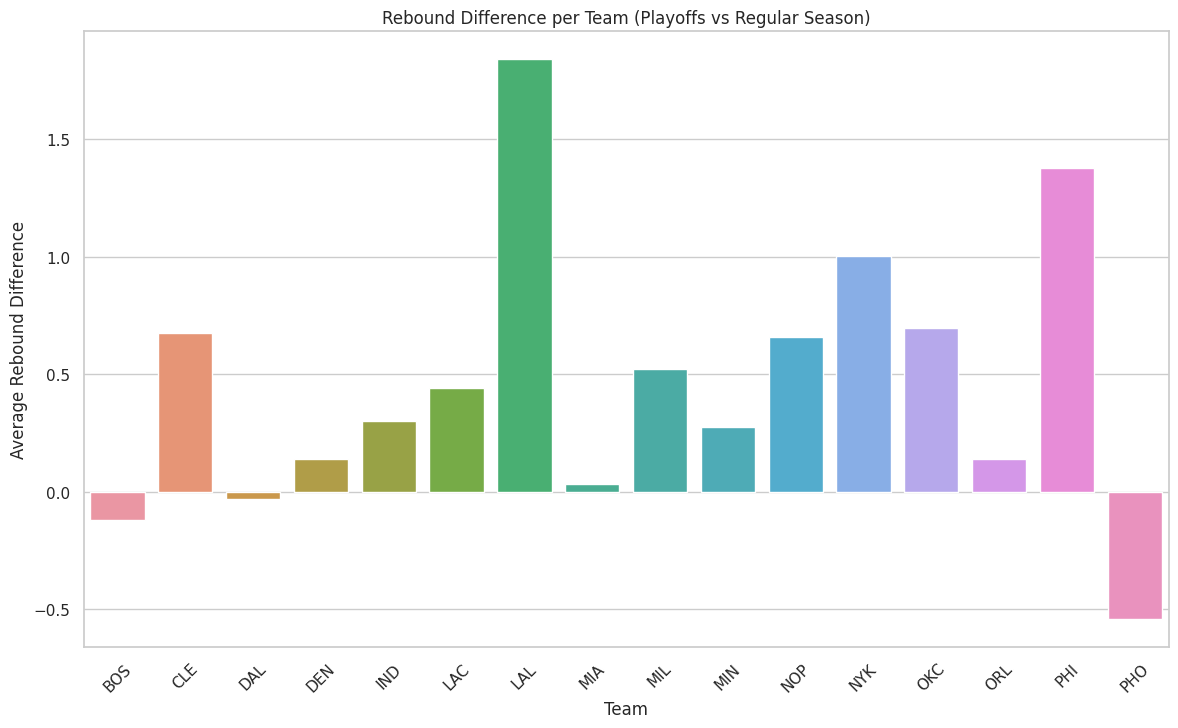

In [15]:
# Calculate average rebounds per team for both regular season and playoffs
avg_rebounds_regular = regular_season_df.groupby('Team')['Rebounds'].mean().reset_index()
avg_rebounds_playoffs = playoffs_df.groupby('Team')['Rebounds'].mean().reset_index()

# Merge the datasets to compare
rebounds_comparison = avg_rebounds_regular.merge(avg_rebounds_playoffs, on='Team', suffixes=('_Regular', '_Playoffs'))

# Calculate the difference in rebounds
rebounds_comparison['Rebound_Difference'] = rebounds_comparison['Rebounds_Playoffs'] - rebounds_comparison['Rebounds_Regular']

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Team', y='Rebound_Difference', data=rebounds_comparison)
plt.title('Rebound Difference per Team (Playoffs vs Regular Season)')
plt.xticks(rotation=45)
plt.ylabel('Average Rebound Difference')
plt.show()